In [2]:
import ant_colony as ac
import json

In [3]:
# nodo inicial
init_node_ex = 0
hp_trials = 2
save_hp = True

In [4]:
G = ac.rand_dist_matrix(10, 
                        graph=True, 
                        int=True, 
                        scale_factor=100, 
                        round_factor=0, 
                        seed=1950)

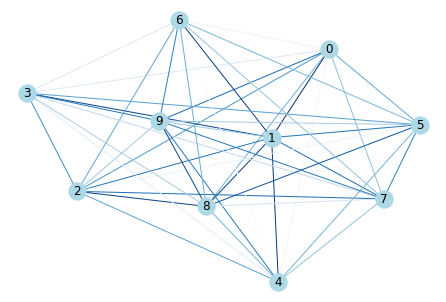

In [5]:
# graficar el graph
ac.plot_graph(G, m_plot='graph')

In [6]:
study = ac.optim_h_params(G,
                          init_node = init_node_ex,
                          trials = hp_trials, 
                          save = save_hp)

[I 2021-04-27 19:20:28,466] Using an existing study with name 'optimize_aco' instead of creating a new one.
[I 2021-04-27 19:20:28,681] Trial 2 finished with value: 279841.00001364946 and parameters: {'n_ants': 3, 'max_iter': 1, 'rho': 0.4885405223295042, 'alpha': 2, 'beta': 2}. Best is trial 0 with value: 261121.011229678.
[I 2021-04-27 19:20:31,540] Trial 3 finished with value: 279841.04571341275 and parameters: {'n_ants': 53, 'max_iter': 100, 'rho': 0.8828628830733743, 'alpha': 0, 'beta': 5}. Best is trial 0 with value: 261121.011229678.


Hyper-parameters saved in ./best_hiper_params.db


In [7]:
best_params = ac.load_params('best_hiper_params.db')

In [8]:
colony_ = ac.colony(G, init_node_ex, **best_params)

In [9]:
colony_.solve_tsp()

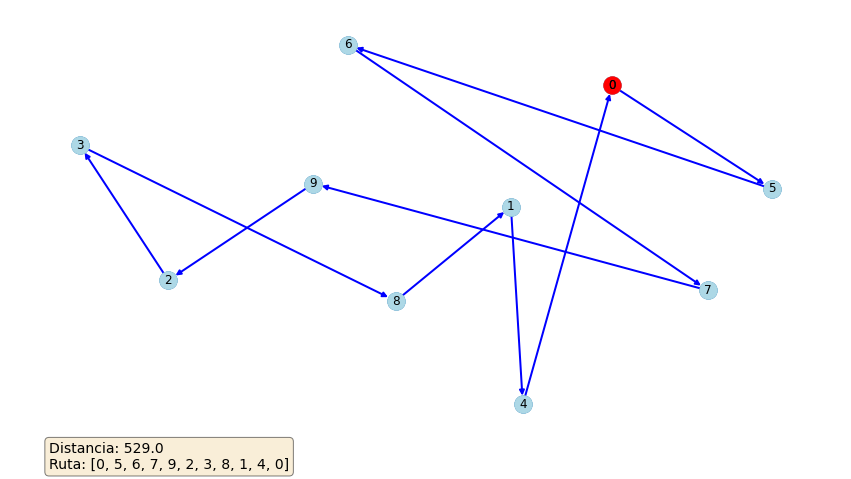

In [10]:
colony_.plot_route(plt_size=(15, 8))

In [11]:
sln_r = colony_.best_route

In [12]:
sln_d = colony_.best_dist

In [13]:
sln_dic = {'route': sln_r, 'distance': sln_d}

In [14]:
with open("aco_sln.json", "w") as outfile: 
    json.dump(sln_dic, outfile)
outfile.close()